# FIFA 2019  Player Analysis

Dataset from: [FIFA 19 player dataset | Kaggle](https://www.kaggle.com/datasets/winterbreeze/fifa19eda)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
dataframe = pd.read_csv('fifa_eda.csv', index_col=0)
dataframe.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
ID,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [56]:
for col in dataframe.columns:
    print(col)

Name
Age
Nationality
Overall
Potential
Club
Value
Wage
Preferred Foot
International Reputation
Skill Moves
Position
Joined
Contract Valid Until
Height
Weight
Release Clause


In [57]:
df1 = pd.DataFrame(dataframe, columns=['Name', 'Wage', 'Value'])
df1.head()

,Name,Wage,Value
ID,,,
158023,L. Messi,565.0,110500.0
20801,Cristiano Ronaldo,405.0,77000.0
190871,Neymar Jr,290.0,118500.0
193080,De Gea,260.0,72000.0
192985,K. De Bruyne,355.0,102000.0


In [58]:
# convert the units to actual value 1000
df1['Wage'] = df1['Wage'] * 1000
df1['Value'] = df1['Value'] * 1000

In [59]:
df1.head()

,Name,Wage,Value
ID,,,
158023,L. Messi,565000.0,110500000.0
20801,Cristiano Ronaldo,405000.0,77000000.0
190871,Neymar Jr,290000.0,118500000.0
193080,De Gea,260000.0,72000000.0
192985,K. De Bruyne,355000.0,102000000.0


In [61]:
df1['Difference'] = df1['Value'] - df1['Wage']
df1.head()

,Name,Wage,Value,Difference
ID,,,,
158023,L. Messi,565000.0,110500000.0,109935000.0
20801,Cristiano Ronaldo,405000.0,77000000.0,76595000.0
190871,Neymar Jr,290000.0,118500000.0,118210000.0
193080,De Gea,260000.0,72000000.0,71740000.0
192985,K. De Bruyne,355000.0,102000000.0,101645000.0


## Sort Players by the Difference between Value and Wage

In [63]:
df1.sort_values(by = 'Difference', ascending=False)

,Name,Wage,Value,Difference
ID,,,,
190871,Neymar Jr,290000.0,118500000.0,118210000.0
158023,L. Messi,565000.0,110500000.0,109935000.0
192985,K. De Bruyne,355000.0,102000000.0,101645000.0
183277,E. Hazard,340000.0,93000000.0,92660000.0
211110,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
234508,C. Singh,0.0,NaN,NaN
237744,R. Kawai,1000.0,NaN,NaN
51963,T. Warner,1000.0,NaN,NaN


## Plot Wage vs Value

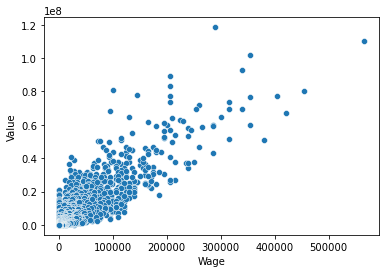

In [65]:
graph = sns.scatterplot(x='Wage', y='Value', data=df1)

## Create Interactive Plot With Bokeh

In [77]:
from bokeh.plotting import figure, show


In [79]:
TOOLTIPS = [("index", "$index"),
            ("(Wage, Value)", "(@Wage, @Value)"),
            ("Name", '@Name')]

p = figure(width=400, height=400, tooltips=TOOLTIPS,
           title="FIFA 2019")

p = figure(title='FIFA 2019', plot_width=700, plot_height=700, tooltips=TOOLTIPS)

p.circle('Wage', 'Value', size=10, source=df1)

show(p)